In [2]:
''' Data Preprocessing and Analysis for Implicit Trust based recommendation system
    developed by Priyanka Singhal
'''
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the Epinions Dataset

In [3]:
#Step 1: load the dataset
file_path = 'epinions_with_quotes.json'
epinion_data = pd.read_json(file_path, lines=True)
epinion_data.head(3)

,item,paid,review,stars,time,user
0,Minolta_QMS_PagePro_1250E_Printers,260.0,i got this printer from minolta as a warranty ...,4,1027296000,fgb59h
1,Sony_VAIO_PCG_K45_P4_538_3_2GHz_1MB_L2_533MHz_...,1800.0,although i love my vaio especially the gorgeou...,2,1201305600,bucho_ky
2,Sony_VAIO_PCG_K45_P4_538_3_2GHz_1MB_L2_533MHz_...,1000.0,this is my first laptop and i bought it about ...,4,1118016000,redp944


In [4]:
print('Rows:', epinion_data.shape[0], '; Columns:', epinion_data.shape[1], '\n')

Rows: 188477 ; Columns: 6 



# Basic Stats of Reviews and ratings

In [5]:
epinion_data.describe()

,paid,stars,time
count,1.884770e+05,188477.000000,1.884770e+05
mean,1.487711e+07,3.619991,1.124308e+09
std,3.553505e+09,1.502810,9.401803e+07
min,-2.210000e+02,1.000000,9.796896e+08
25%,7.900000e+01,2.000000,1.048810e+09
50%,2.490000e+02,4.000000,1.117930e+09
75%,1.034000e+03,5.000000,1.188432e+09
max,1.000000e+12,5.000000,1.384387e+09


## Print the number of unique users

In [6]:
# number of unique users
print("number of users: ", epinion_data.user.nunique())

number of users:  116260


# Print the number of unique items

In [7]:
# number of unique items
print("number of items: ", epinion_data.item.nunique())

number of items:  41269


# Print the number of unique ratings(stars)

In [8]:
# number of unique ratings
print("number of ratings: ", epinion_data.stars.nunique())

number of ratings:  5


## Print the rating Count

In [9]:
stars_count = epinion_data.groupby(by=['stars']).agg({'user': 'count'}).reset_index()
stars_count.columns = ['Stars', 'Count']
print(stars_count)

   Stars  Count
0      1  33305
1      2  15090
2      3  17151
3      4  47308
4      5  75623


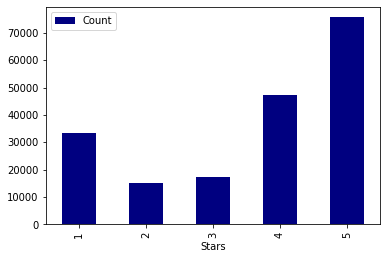

In [10]:
stars_count.plot.bar(x='Stars', y='Count', color='navy')

# Print number of users who have given more than 4 ratings

In [11]:
ratings_per_user=epinion_data.groupby('user').agg({'stars':'count'}).reset_index()
ratings_per_user.columns = ['User', 'Rating_Count']
ratings_per_user = ratings_per_user[ratings_per_user.Rating_Count > 4]

print("Number of users who have given more than 4 ratings: ", ratings_per_user.shape[0])

Number of users who have given more than 4 ratings:  4903


# User and their rating count for count > 4

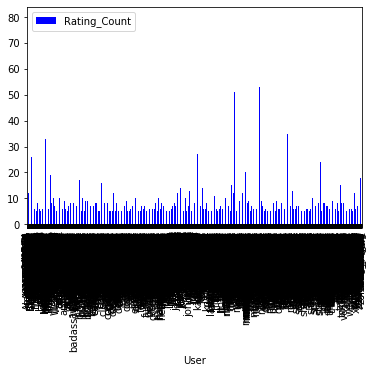

In [12]:
ratings_per_user.plot.bar(x='User', y='Rating_Count', color='blue')
# plt.barh(ratings_per_user.User, ratings_per_user.Rating_Count, color='blue')
# plt.title('Count of Ratings per User', fontsize=15)
# plt.xlabel('User', fontsize=15)
# plt.ylabel('Nunber of Ratings', fontsize=15)
# plt.grid(ls='dotted')
# plt.show()

# Missing Value Analysis

# Number of missing records

In [13]:
epinion_data.isnull().sum(axis=0)

item      0
paid      0
review    0
stars     0
time      0
user      0
dtype: int64

In [14]:
len(epinion_data.index)-epinion_data.count()

item      0
paid      0
review    0
stars     0
time      0
user      0
dtype: int64